In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [3]:
from BB2TileExact import *
sys.path.append("final_run/")

In [4]:
%load_ext autoreload
%autoreload 2
from poly_utils import *

In [5]:
objid =10 
sampleNworkers=20
PRINT = True
SAVE = True
tqdm_on=True
EXCLUDE_BBG=True
random_state=511
load_existing_tiles_from_file=False
tiles=""
def create_vtiles(objid,sampleNworkers,random_state,tiles="",PRINT=False,SAVE=False,\
                  tqdm_on=False,EXCLUDE_BBG=True,PLOT=True,load_existing_tiles_from_file=False):
    # Ji_tbl (bb_info) is the set of all workers that annotated object i
    bb_objects = bb_info[bb_info["object_id"]==objid]
    if EXCLUDE_BBG: bb_objects =  bb_objects[bb_objects.worker_id!=3]
    # Sampling Data from Ji table
    if sampleNworkers>0 and sampleNworkers<len(bb_objects):
        bb_objects = bb_objects.sample(n=sampleNworkers,random_state=random_state)
    # Create a list of polygons based on worker BBs
    xylocs = [list(zip(*process_raw_locs([x,y]))) for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]
    BB = []
    for xyloc in xylocs:
        BB.append(Polygon(xyloc).buffer(0))

    #Compute Tiles
    if load_existing_tiles_from_file:
        tiles = pkl.load(open("{0}/tiles{1}.pkl".format(DATA_DIR,objid),'r'))
        #worker_lst= pkl.load(open("{0}/worker{1}.pkl".format(DATA_DIR,objid),'r'))
    elif tiles=="":
        tiles = BB2TileExact(objid,BB,tqdm_on=tqdm_on,save_tiles=SAVE)
        vtiles,overlap_area,total_area=uniqify(BB, overlap_threshold=0.2, SAVE=False, SAVEPATH=None, PLOT=PLOT)
        print "Overlap ratio:",overlap_area/float(total_area)
        pkl.dump(vtiles,open("{0}/vtiles{1}.pkl".format(DATA_DIR,objid),'w'))
    return vtiles, BB

In [6]:
def visualizeTilesSeparate(tiles,colorful=True):
#     plt.figure()
    colors=cm.rainbow(np.linspace(0,1,len(tiles)))
    for t,i in zip(tiles,range(len(tiles))):
#         plt.figure()
        if colorful:
            c = colors[i]
        else:
            #c="lime"
            c="blue"
        if type(t)==shapely.geometry.polygon.Polygon:
            plot_coords(t,color=c,reverse_xy=True,fill_color=c)
        elif type(t)==shapely.geometry.MultiPolygon or type(t)==shapely.geometry.collection:
            for region in t:
                if type(t)!=shapely.geometry.LineString:
                    plot_coords(region,color=c,reverse_xy=True,fill_color=c)
    #xylocs of the largest tile for estimating the obj size
    xlocs,ylocs = tiles[np.argmax([t.area for t in tiles])].exterior.coords.xy
    plt.ylim(np.min(ylocs)-50,np.max(ylocs)+50)
    plt.gca().invert_yaxis()

In [7]:
def create_vtiles(objid,sampleNworkers,random_state,tiles="",PRINT=False,SAVE=False,\
                  tqdm_on=False,EXCLUDE_BBG=True,PLOT=True,load_existing_tiles_from_file=False):
    # Ji_tbl (bb_info) is the set of all workers that annotated object i
    bb_objects = bb_info[bb_info["object_id"]==objid]
    if EXCLUDE_BBG: bb_objects =  bb_objects[bb_objects.worker_id!=3]
    # Sampling Data from Ji table
    if sampleNworkers>0 and sampleNworkers<len(bb_objects):
        bb_objects = bb_objects.sample(n=sampleNworkers,random_state=random_state)
    # Create a list of polygons based on worker BBs
    xylocs = [list(zip(*process_raw_locs([x,y]))) for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]
    BB = []
    for xyloc in xylocs:
        BB.append(Polygon(xyloc).buffer(0))

    #Compute Tiles
    if load_existing_tiles_from_file:
        tiles = pkl.load(open("{0}/tiles{1}.pkl".format(DATA_DIR,objid),'r'))
        #worker_lst= pkl.load(open("{0}/worker{1}.pkl".format(DATA_DIR,objid),'r'))
    elif tiles=="":
        tiles = BB2TileExact(objid,BB,tqdm_on=tqdm_on,save_tiles=SAVE)
        vtiles,overlap_area,total_area=uniqify(BB, overlap_threshold=0.2, SAVE=False, SAVEPATH=None, PLOT=PLOT)
        print "Overlap ratio:",overlap_area/float(total_area)
        pkl.dump(vtiles,open("{0}/vtiles{1}.pkl".format(DATA_DIR,objid),'w'))
    return vtiles, BB

In [8]:
def plot_coords(obj, color='red', reverse_xy=False, linestyle='-', fill_color="", show=False, invert_y=False):
    #Plot shapely polygon coord
    if type(obj) != shapely.geometry.MultiPolygon:
        obj = [obj]

    for ob in obj:
        if ob.exterior is None:
            print 'Plotting bug: exterior is None (potentially a 0 area tile). Ignoring and continuing...'
            continue
        if reverse_xy:
            x, y = ob.exterior.xy
        else:
            y, x = ob.exterior.xy
        plt.plot(x, y, linestyle, linewidth=0, color=color, zorder=1)
        if fill_color != "":
            plt.fill_between(x, y, facecolor=fill_color,  linewidth=0, alpha=0.5)
    if invert_y:
        plt.gca().invert_yaxis()

TopologyException: side location conflict at 388 290
TopologyException: found non-noded intersection between LINESTRING (383.576 250.145, 391.65 236.629) and LINESTRING (391.65 236.629, 383 246) at 391.65030674846616 236.62883435582833
Self-intersection at or near point 563.38553476003085 299.89825312002739
TopologyException: found non-noded intersection between LINESTRING (460 224, 478.646 225.621) and LINESTRING (509.723 233.97, 471.79 223.779) at 478.64642857142854 225.62142857142857
TopologyException: side location conflict at 427.0014515163607 333.68075478850756
TopologyException: found non-noded intersection between LINESTRING (521 335, 535.667 331.333) and LINESTRING (535.667 331.333, 523.667 334.333) at 529.06853582554515 332.98286604361368
TopologyException: found non-noded intersection between LINESTRING (384.09 265.71, 384.529 271.647) and LINESTRING (385.582 276.182, 384.339 269.083) at 384.33944954128441 269.08256880733956
TopologyException: found non-noded intersection be

Topological Error 2 2
Topological Error 3 0


TopologyException: found non-noded intersection between LINESTRING (381 250, 381.603 253.448) and LINESTRING (381.603 253.447, 381.603 253.447) at 381.60319461958807 253.44682639764605
TopologyException: found non-noded intersection between LINESTRING (521 335, 535.667 331.333) and LINESTRING (535.667 331.333, 523.667 334.333) at 529.06853582554515 332.98286604361368
TopologyException: found non-noded intersection between LINESTRING (384.09 265.71, 384.529 271.647) and LINESTRING (385.582 276.182, 384.339 269.083) at 384.33944954128441 269.08256880733956


Topological Error 4 1
Topological Error 4 9
Topological Error 4 13


TopologyException: found non-noded intersection between LINESTRING (383.274 250.651, 392.343 235.469) and LINESTRING (392.343 235.469, 386 240) at 392.34304207119737 235.46925566343046


Topological Error 5 0


TopologyException: found non-noded intersection between LINESTRING (383.249 250.691, 384.785 248.122) and LINESTRING (384.785 248.122, 383 250) at 384.7845303867403 248.12154696132603


Topological Error 6 0


TopologyException: found non-noded intersection between LINESTRING (383.207 250.763, 392.734 234.815) and LINESTRING (393.904 232.856, 383.207 250.763) at 391.60935636358272 236.69738173922022
TopologyException: found non-noded intersection between LINESTRING (384.188 267.036, 385 278) and LINESTRING (386.365 280.659, 384.339 269.083) at 384.33944954128441 269.0825688073395
TopologyException: found non-noded intersection between LINESTRING (402.785 312.634, 404 315) and LINESTRING (403.716 314.448, 402.785 312.634) at 403.47751888246404 313.9825367711141


Topological Error 7 0
Topological Error 7 13
Topological Error 7 14


TopologyException: found non-noded intersection between LINESTRING (388 290, 381.603 253.447) and LINESTRING (382.667 251.667, 352 303) at 381.60319461958807 253.44682639764608
TopologyException: found non-noded intersection between LINESTRING (389.693 242.955, 383 250) and LINESTRING (383.576 250.145, 384.785 248.122) at 384.7845303867403 248.121546961326


Topological Error 8 0
Topological Error 8 46


TopologyException: found non-noded intersection between LINESTRING (383.183 262.473, 381.603 253.447) and LINESTRING (396.296 228.852, 379.784 256.491) at 381.60319461958807 253.44682639764608


Topological Error 9 0
Overlap ratio: 0.869897163525


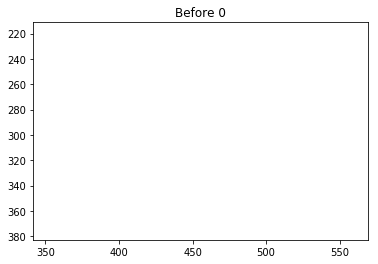

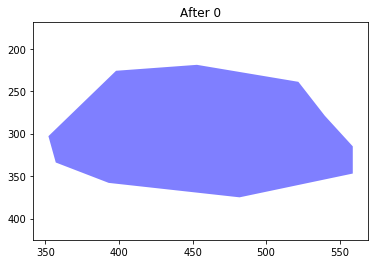

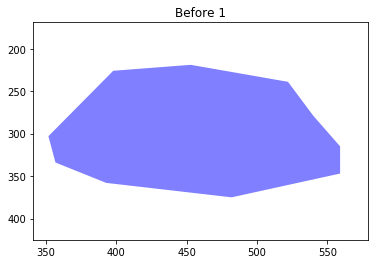

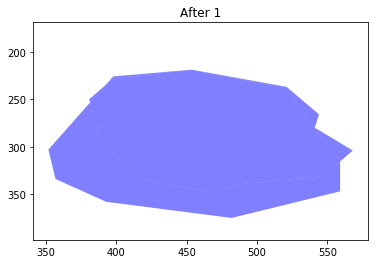

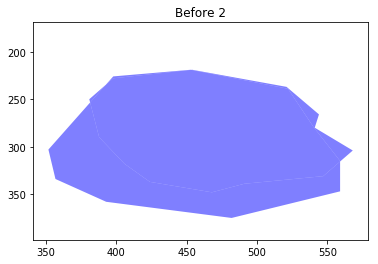

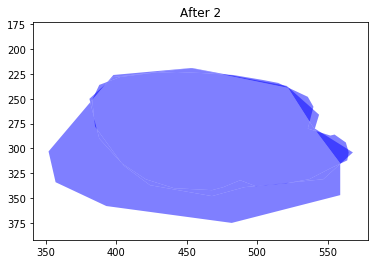

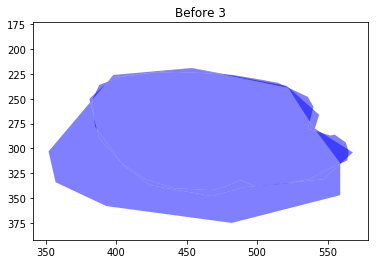

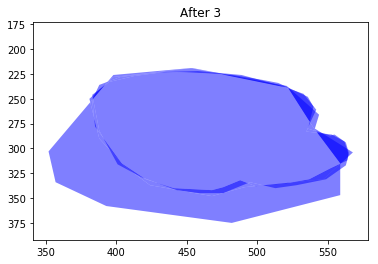

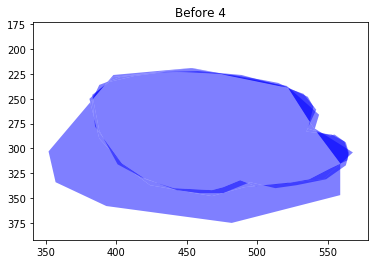

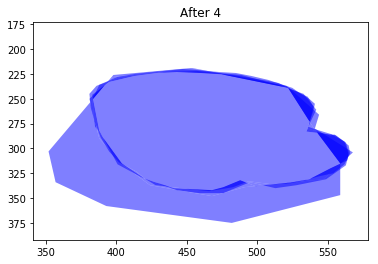

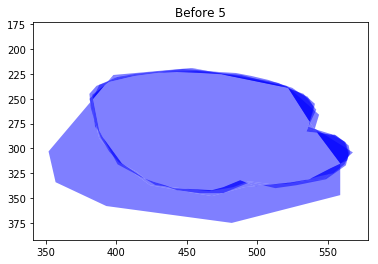

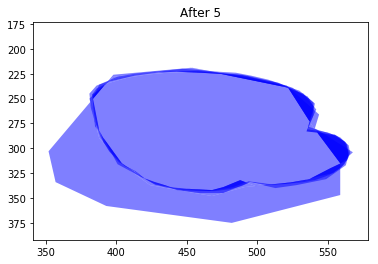

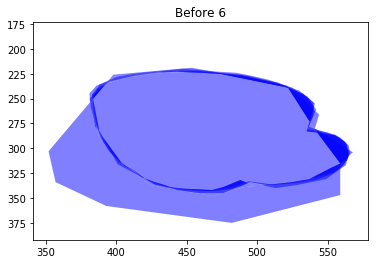

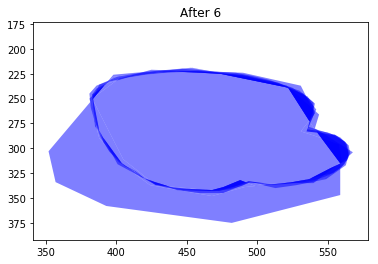

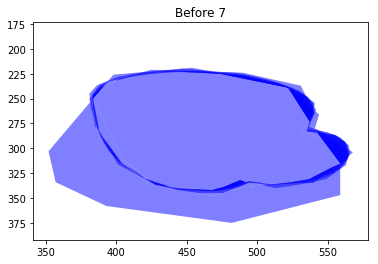

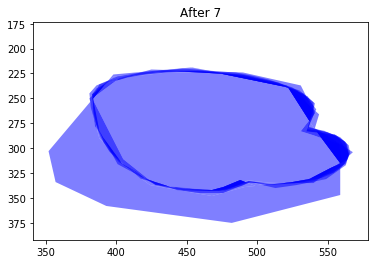

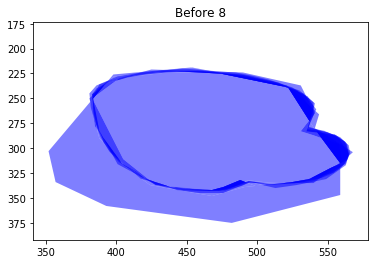

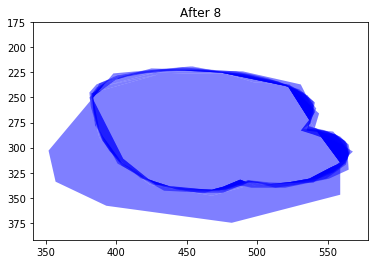

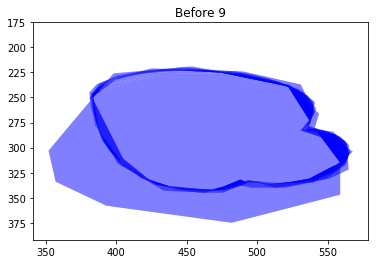

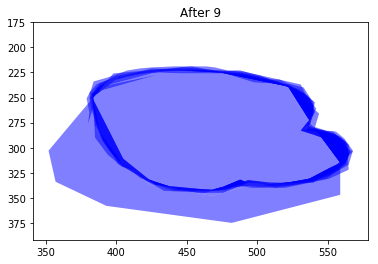

In [57]:
vtiles,BB = create_vtiles(objid,10,121)

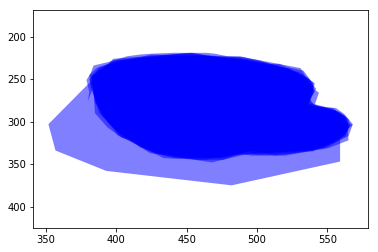

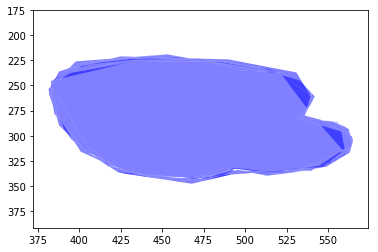

In [56]:
visualizeTilesSeparate(BB,colorful=False)
visualizeTilesSeparate(vtiles,colorful=False)

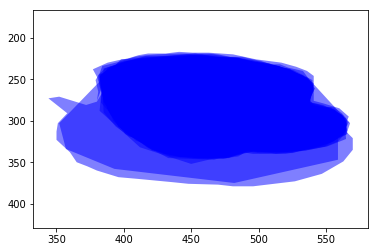

In [50]:
visualizeTilesSeparate(BB,colorful=False)

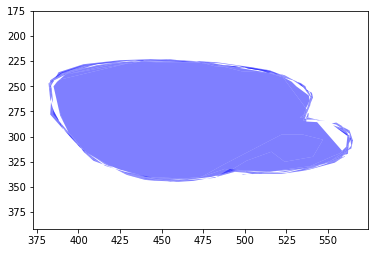

In [49]:
visualizeTilesSeparate(vtiles,colorful=False)

In [58]:
vtiles,BB = create_vtiles(45,10,121)

TopologyException: found non-noded intersection between LINESTRING (78 206, 83.4 205.7) and LINESTRING (83.4 205.7, 77.4 205.914) at 83.39999999999992 205.69999999999999
TopologyException: found non-noded intersection between LINESTRING (83.4 205.7, 94.8014 205.293) and LINESTRING (98.9901 205.143, 92.8723 205.362) at 93.471950631515838 205.34028747744588
TopologyException: found non-noded intersection between LINESTRING (47 207, 61 206.5) and LINESTRING (64.9077 206.36, 56.3688 206.665) at 59.473864932498174 206.55450482383935
Self-intersection at or near point 71.64073041169965 206.11997391386788
TopologyException: found non-noded intersection between LINESTRING (49.8943 142.121, 49.9213 142.09) and LINESTRING (49.9213 142.09, 49.8554 142.111) at 49.921348314606718 142.08988764044943
TopologyException: found non-noded intersection between LINESTRING (48.3158 143.925, 45.9499 146.629) and LINESTRING (46 153, 46 146.571) at 46 146.57142857142861
TopologyException: found non-noded inter

Topological Error 29 24


TopologyException: found non-noded intersection between LINESTRING (45.6863 155.196, 43.6508 169.444) and LINESTRING (45 175, 44.2308 165.385) at 44.230769230769234 165.38461538461539
TopologyException: found non-noded intersection between LINESTRING (98.6724 137.931, 95.6329 137.291) and LINESTRING (95.6329 137.291, 96.9547 137.808) at 95.632911392405234 137.29113924050637
TopologyException: found non-noded intersection between LINESTRING (49.9213 142.09, 57.611 139.609) and LINESTRING (57.9208 139.465, 57.6098 139.61) at 57.609756097561025 139.60975609756096
TopologyException: found non-noded intersection between LINESTRING (88.1682 205.435, 91.1351 205.27) and LINESTRING (91.1351 205.27, 88.6026 205.411) at 90.383888026605618 205.31200622074414


Topological Error 57 4
Topological Error 58 10
Topological Error 61 57
Topological Error 69 54


TopologyException: found non-noded intersection between LINESTRING (63 137.871, 63.3117 137.74) and LINESTRING (63.3117 137.74, 57.9208 139.465) at 63.311688311688023 137.74025974025983


Topological Error 70 62


TopologyException: side location conflict at 52.753846153846183 203.7076923076923
TopologyException: found non-noded intersection between LINESTRING (100.951 205.073, 101.087 204.87) and LINESTRING (100.951 205.073, 103 205) at 100.95121951219514 205.07317073170731


Topological Error 83 50
Topological Error 87 14
Overlap ratio: 0.0351807087372


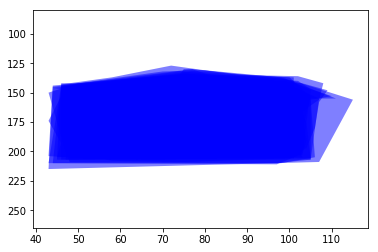

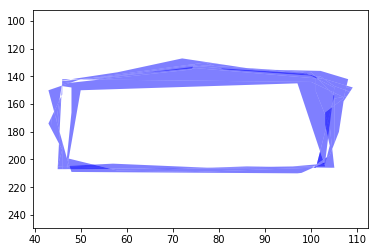

In [59]:
visualizeTilesSeparate(BB,colorful=False)
visualizeTilesSeparate(vtiles,colorful=False)

In [63]:
vtiles,BB = create_vtiles(37,10,111)

TopologyException: side location conflict at 508 350
TopologyException: found non-noded intersection between LINESTRING (541.286 202.857, 541.286 202.857) and LINESTRING (541.286 202.857, 541.783 207.826) at 541.28571428571422 202.8571428571428
TopologyException: found non-noded intersection between LINESTRING (541.286 202.857, 541.286 202.857) and LINESTRING (541.286 202.857, 541.783 207.826) at 541.28571428571422 202.8571428571428
TopologyException: found non-noded intersection between LINESTRING (567.465 264.447, 567.852 253.984) and LINESTRING (567.742 256.978, 567.465 264.447) at 567.4758321758452 264.1525312521772
TopologyException: found non-noded intersection between LINESTRING (543 220, 542.744 217.442) and LINESTRING (542 217, 542.761 217.609) at 542.76086956521738 217.60869565217388
TopologyException: side location conflict at 548.25806451612902 352.54838709677421
TopologyException: found non-noded intersection between LINESTRING (536 308, 535.732 305.585) and LINESTRING (53

Topological Error 36 14


TopologyException: side location conflict at 542 217


Topological Error 79 47


TopologyException: found non-noded intersection between LINESTRING (547 221, 543 217.8) and LINESTRING (543 217.8, 543 217.8) at 543 217.80000000000001


Topological Error 117 45


TopologyException: side location conflict at 511.89108910891088 378.71287128712879


Topological Error 129 92


TopologyException: found non-noded intersection between LINESTRING (512 381, 510.68 383.86) and LINESTRING (511 385, 511 383.167) at 511 383.16666666666669
TopologyException: found non-noded intersection between LINESTRING (512 381, 510.68 383.86) and LINESTRING (511 383.167, 511 383.167) at 511 383.16666666666674


Topological Error 141 30
Topological Error 141 91


TopologyException: found non-noded intersection between LINESTRING (509.294 231.679, 509.294 231.678) and LINESTRING (507.02 233.649, 509.295 231.678) at 509.29394580249419 231.678580304505


Topological Error 160 142


TopologyException: found non-noded intersection between LINESTRING (542 207.25, 542.642 205.806) and LINESTRING (542.642 205.806, 541.667 208) at 542.0155472636817 207.21501865671607
TopologyException: found non-noded intersection between LINESTRING (540.286 200.286, 540.286 200.286) and LINESTRING (540.286 200.286, 541 206) at 540.28571428571422 200.28571428571425


Topological Error 176 52
Topological Error 177 101


TopologyException: side location conflict at 519.8125 395.5


Topological Error 184 193


TopologyException: found non-noded intersection between LINESTRING (563.176 251.294, 560.75 240.375) and LINESTRING (563.176 251.294, 562.899 250.381) at 563.17647058823491 251.29411764705725


Topological Error 211 231


TopologyException: found non-noded intersection between LINESTRING (511.891 378.713, 511 360) and LINESTRING (511.891 378.713, 511.891 378.713) at 511.89108910891878 378.71287128729512


Topological Error 217 81


TopologyException: found non-noded intersection between LINESTRING (506.786 287.429, 506.786 287.429) and LINESTRING (506.786 287.429, 506.786 287.429) at 506.78571428412261 287.4285714272981


Topological Error 237 142


TopologyException: found non-noded intersection between LINESTRING (511.394 355.667, 511.515 354.333) and LINESTRING (511.515 354.333, 511.394 355.667) at 511.45454545454544 354.99999999999994


Topological Error 274 249


TopologyException: found non-noded intersection between LINESTRING (565 263, 566.356 269.103) and LINESTRING (566.356 269.103, 566.356 269.103) at 566.35632183908046 269.10344827586192
TopologyException: found non-noded intersection between LINESTRING (567.956 262.386, 566.356 269.103) and LINESTRING (566.812 267.188, 566.82 267.158) at 566.81545607149667 267.17508449971371


Topological Error 285 60
Topological Error 285 257


TopologyException: found non-noded intersection between LINESTRING (519.385 392.077, 519.304 391.435) and LINESTRING (519.304 391.435, 519.385 392.077) at 519.379893974727 392.03915179781598


Topological Error 293 35


TopologyException: found non-noded intersection between LINESTRING (540.2 199.6, 540.143 199.143) and LINESTRING (540 199, 540.2 199.6) at 540.19999999999993 199.59999999999977


Topological Error 300 284
Overlap ratio: 0.0202023559565


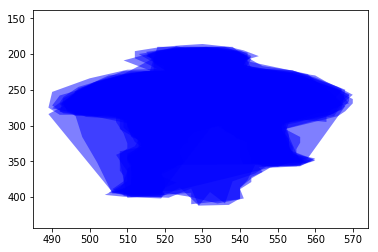

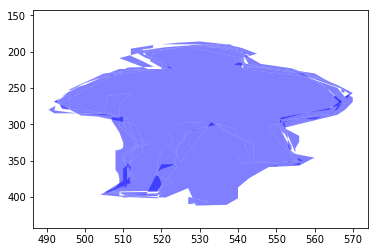

In [64]:
visualizeTilesSeparate(BB,colorful=False)
visualizeTilesSeparate(vtiles,colorful=False)

In [67]:
vtiles,BB = create_vtiles(43,10,121)

TopologyException: found non-noded intersection between LINESTRING (231.759 387.552, 226.6 377.971) and LINESTRING (226.6 377.971, 229.258 382.907) at 229.1417174414471 382.69176096268751
Too few points in geometry component at or near point 168.65957446808511 345.85106382978722
TopologyException: found non-noded intersection between LINESTRING (132.77 469.902, 129.435 468.472) and LINESTRING (128.972 468.274, 132.77 469.902) at 130.54579178363491 468.94819647870071
TopologyException: side location conflict at 207 353
TopologyException: found non-noded intersection between LINESTRING (217 475, 216.681 471.967) and LINESTRING (202 472, 216.684 472) at 216.68421052631578 472
Self-intersection at or near point 168.25974025974025 337.45454545454544
Self-intersection at or near point 168.77489706097882 328.43930143287071
TopologyException: side location conflict at 168.25974025974025 337.45454545454538
Self-intersection at or near point 168.77489706097882 328.43930143287071
TopologyExceptio

Topological Error 108 79
Topological Error 108 99
Topological Error 110 22


TopologyException: found non-noded intersection between LINESTRING (167.5 468.375, 170.273 469.068) and LINESTRING (167.5 468.375, 170.273 469.068) at 167.50025475869361 468.37506368967342
TopologyException: found non-noded intersection between LINESTRING (165.818 467.909, 165.818 467.909) and LINESTRING (165.687 467.899, 165.818 467.909) at 165.81818181818178 467.90909090909093
TopologyException: found non-noded intersection between LINESTRING (165.818 467.909, 165.818 467.909) and LINESTRING (165.687 467.899, 165.818 467.909) at 165.81818181818181 467.90909090909093
TopologyException: found non-noded intersection between LINESTRING (170.838 469.054, 170.958 469.051) and LINESTRING (170.838 469.054, 161.167 466) at 170.83783783733119 469.05405405389405


Topological Error 125 13
Topological Error 125 103
Topological Error 125 104
Topological Error 131 125


TopologyException: found non-noded intersection between LINESTRING (172.889 470.24, 171.474 469.368) and LINESTRING (173.2 469.8, 171.474 469.368) at 171.47368421052644 469.36842105263162
TopologyException: found non-noded intersection between LINESTRING (171.474 469.368, 173.2 469.8) and LINESTRING (173.2 469.8, 170.273 469.068) at 172.48504096625325 469.62126024156333
TopologyException: found non-noded intersection between LINESTRING (221.646 373.189, 220.286 372.143) and LINESTRING (220.286 372.143, 221.733 373.327) at 220.28571428571502 372.14285714285768
TopologyException: found non-noded intersection between LINESTRING (170.838 469.054, 159.979 465.625) and LINESTRING (164.167 466, 159.979 465.625) at 159.97916666666677 465.625


Topological Error 132 78
Topological Error 132 109
Topological Error 134 81
Topological Error 137 136


TopologyException: found non-noded intersection between LINESTRING (164.167 466, 159.004 465.538) and LINESTRING (159.979 465.625, 158 465) at 159.97916666666637 465.62499999999994


Topological Error 168 138


TopologyException: found non-noded intersection between LINESTRING (221.646 373.189, 224.948 378.417) and LINESTRING (223.56 376.22, 226.659 379.512) at 223.56 376.21999999999997
TopologyException: found non-noded intersection between LINESTRING (167.471 354.235, 160.778 360.37) and LINESTRING (162.876 358.447, 165.432 357.211) at 162.87577639751555 358.44720496894411


Topological Error 183 131
Topological Error 183 152


TopologyException: found non-noded intersection between LINESTRING (166.898 354.76, 159 362) and LINESTRING (162.876 358.447, 165.432 357.211) at 162.87577639751555 358.44720496894411


Topological Error 206 151


TopologyException: found non-noded intersection between LINESTRING (180.327 302.061, 184.924 299.863) and LINESTRING (184.924 299.863, 183 300) at 184.92366412213735 299.86259541984731


Topological Error 215 200


TopologyException: found non-noded intersection between LINESTRING (125.14 467.056, 126.087 467.435) and LINESTRING (126 467, 126.087 467.435) at 126.08695652173913 467.43478260869568


Topological Error 236 161


TopologyException: found non-noded intersection between LINESTRING (219.667 370.852, 220.655 371.621) and LINESTRING (220.655 371.621, 219.507 369.803) at 220.65517241379305 371.62068965517238
TopologyException: found non-noded intersection between LINESTRING (221.646 373.189, 220.286 372.143) and LINESTRING (214.792 367.917, 221.646 373.189) at 220.96474809639173 372.66519084337824


Topological Error 244 251
Topological Error 244 254


Ring Self-intersection at or near point 192.28338762140905 468.51791530937993
TopologyException: found non-noded intersection between LINESTRING (213.784 328.595, 213.801 328.382) and LINESTRING (213.801 328.382, 213.784 328.595) at 213.79262133213152 328.48854401442168


Topological Error 265 77


TopologyException: found non-noded intersection between LINESTRING (179 474, 177.116 472.84) and LINESTRING (177.375 473, 177 473) at 177.37499999999997 473


Topological Error 273 70


TopologyException: found non-noded intersection between LINESTRING (129.875 384.8, 128.636 388.764) and LINESTRING (129.5 386, 130.125 383.25) at 129.49999999999997 386.00000000000006
TopologyException: found non-noded intersection between LINESTRING (168.66 345.851, 168.953 352.021) and LINESTRING (168.948 351.902, 169.054 351.811) at 168.94771241830065 351.9019607843137


Topological Error 285 98
Topological Error 287 258


TopologyException: found non-noded intersection between LINESTRING (232.667 393.333, 232.5 392.5) and LINESTRING (232.5 392.5, 232.733 393.2) at 232.50000000000006 392.50000000000017


Topological Error 297 301


TopologyException: found non-noded intersection between LINESTRING (208.077 351.231, 210 347) and LINESTRING (208.077 351.231, 207.235 352.353) at 208.07692307692307 351.23076923076923


Topological Error 301 293


TopologyException: found non-noded intersection between LINESTRING (220.655 371.621, 221.646 373.189) and LINESTRING (220.286 372.143, 222.917 374.167) at 221.64566929133855 373.18897637795271
TopologyException: found non-noded intersection between LINESTRING (127 467.8, 126.087 467.435) and LINESTRING (126.087 467.435, 126.553 469.766) at 126.08695652173914 467.43478260869568


Topological Error 306 239
Topological Error 307 154


TopologyException: found non-noded intersection between LINESTRING (110.353 429.077, 110.781 429.486) and LINESTRING (110.415 429.136, 110.338 429.062) at 110.41340960886826 429.13456571283052


Topological Error 322 282


TopologyException: found non-noded intersection between LINESTRING (129.167 387.467, 130.86 382.047) and LINESTRING (130.86 382.047, 130.86 382.047) at 130.86046511627907 382.04651162790697


Topological Error 338 97


TopologyException: found non-noded intersection between LINESTRING (232.667 393.333, 232.5 392.5) and LINESTRING (232.5 392.5, 232.733 393.2) at 232.50000000000006 392.50000000000017


Topological Error 364 316


TopologyException: found non-noded intersection between LINESTRING (130.58 382.544, 129.875 384.8) and LINESTRING (129.5 386, 130.605 382.465) at 130.48877110331043 382.83593246940666
TopologyException: found non-noded intersection between LINESTRING (131.073 380.965, 130.58 382.544) and LINESTRING (130.605 382.465, 130.86 382.047) at 130.60465116279073 382.46511627906972
TopologyException: found non-noded intersection between LINESTRING (127 397, 127.739 393.748) and LINESTRING (127.195 396.143, 127.508 394.763) at 127.29460864084751 395.70372198027093
TopologyException: found non-noded intersection between LINESTRING (232.667 393.333, 235 405) and LINESTRING (232.769 393.846, 233.594 396.438) at 232.7692307692308 393.84615384615404


Topological Error 373 94
Topological Error 373 96
Topological Error 373 177
Topological Error 374 439


TopologyException: found non-noded intersection between LINESTRING (230.585 387.309, 232 392) and LINESTRING (230.605 387.375, 230.817 387.71) at 230.60506329113926 387.37468354430382


Topological Error 387 379


TopologyException: found non-noded intersection between LINESTRING (168.909 351.091, 168.953 352.021) and LINESTRING (168.948 351.902, 169.054 351.811) at 168.94771241830065 351.9019607843137


Topological Error 395 300


TopologyException: found non-noded intersection between LINESTRING (205.471 305.212, 205.471 305.212) and LINESTRING (204.187 304.271, 205.471 305.212) at 205.47058823529412 305.21176470588239


Topological Error 398 425


TopologyException: found non-noded intersection between LINESTRING (230 446, 229.143 445.857) and LINESTRING (229.143 445.857, 229.143 445.857) at 229.1428571428234 445.8571428571766


Topological Error 408 338


TopologyException: found non-noded intersection between LINESTRING (168.444 353.444, 169 353) and LINESTRING (168.444 353.444, 168.444 353.444) at 168.44444444444451 353.4444444444444


Topological Error 416 209


TopologyException: found non-noded intersection between LINESTRING (138.452 371.129, 141.446 369.332) and LINESTRING (145.889 366.667, 140.176 370.094) at 141.25289558908406 369.44826264654961


Topological Error 424 340
Overlap ratio: 0.0171322825441


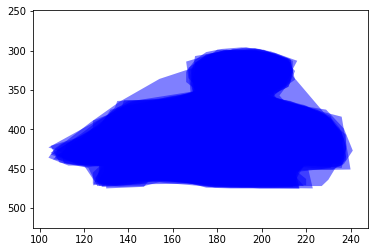

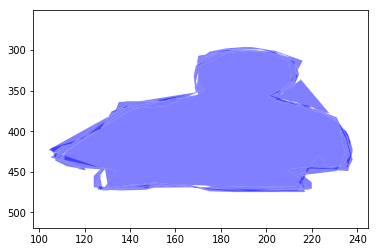

In [68]:
visualizeTilesSeparate(BB,colorful=False)
visualizeTilesSeparate(vtiles,colorful=False)

# Problematic cases

In [9]:
# vtiles,BB = create_vtiles(45,10,121,PLOT=True)

In [26]:
def plot_coords(obj, color='red', reverse_xy=False, linestyle='-',lw=0, fill_color="", show=False, invert_y=False):
    #Plot shapely polygon coord
    if type(obj) != shapely.geometry.MultiPolygon:
        obj = [obj]

    for ob in obj:
        if ob.exterior is None:
            print 'Plotting bug: exterior is None (potentially a 0 area tile). Ignoring and continuing...'
            continue
        if reverse_xy:
            x, y = ob.exterior.xy
        else:
            y, x = ob.exterior.xy
        plt.plot(x, y, linestyle, linewidth=lw, color=color, zorder=1)
        if fill_color != "":
            plt.fill_between(x, y, facecolor=fill_color,  linewidth=lw, alpha=0.5)
    if invert_y:
        plt.gca().invert_yaxis()

In [30]:
def uniqify(tiles, overlap_threshold=0.2, SAVE=False, SAVEPATH=None, PLOT=False):
    # TODO: implement
    print "start"
    verified_tiles = []
    overlap_area = 0.0  # rough number
    for tidx in range(len(tiles)):
        t = tiles[tidx]
        t_to_add = t
        # duplicated = False
        verified_tiles_new = verified_tiles[:]
        if PLOT :
            plt.figure()
            plt.title("Before {}".format(tidx))
            if True:
                plot_coords(t, linestyle='--',lw=1, color="red",reverse_xy=True,invert_y=True)
                #print t.area
                if len(verified_tiles)>0:
                    visualizeTilesSeparate(verified_tiles,colorful=False)#, fill_color="lime")
        for vtidx in range(len(verified_tiles)):
            print "tidx:{}; vtidx{}".format(tidx,vtidx)
            try:
                vt = verified_tiles[vtidx]
            except(IndexError):
                print "last element removed"
            try:
                print "begin geo operations"
                overlap_score = overlap(vt, t)
                if overlap_score > overlap_threshold:
                # if True:
                    # print "Duplicate tiles: ", tidx, vtidx, overlap_score, vt.area, t.area
                    # duplicated = True
                    # if overlap_score < 0.99:
                    if True:
                        verified_tiles_new.remove(vt)
                        overlap_region = vt.intersection(t)
                        diff_region = vt.difference(overlap_region)
                        add_object_to_tiles(verified_tiles_new, overlap_region)
                        add_object_to_tiles(verified_tiles_new, diff_region)
                        # add_object_to_tiles(verified_tiles_new, t.difference(overlap_region))
                        t_to_add = t_to_add.difference(overlap_region)

#                     if PLOT:
#                         plt.figure()
#                         plt.title("[{0},{1}]{2}".format(tidx, vtidx, overlap_score))
#                         if True:
#                         #try:
#                             plot_coords(vt)
#                             plot_coords(t, linestyle='--', color="blue")
#                             plot_coords(overlap_region, fill_color="lime")
                        #except(AttributeError):
                        #    print "problem with plotting"
                else:
                    overlap_area += intersection_area(vt, t)
                    
                print "end geo operations"
            except(shapely.geos.TopologicalError):
                print "Topological Error", tidx, vtidx
        # if not duplicated:
        #     verified_tiles_new.append(t)
        add_object_to_tiles(verified_tiles_new,t_to_add)
        verified_tiles = verified_tiles_new[:]
        if PLOT:
            plt.figure()
            plt.title("After {}".format(tidx))
            if True:
                visualizeTilesSeparate(verified_tiles,colorful=False)#, fill_color="lime")
        
    if SAVE:
        pickle.dump(verified_tiles, open(SAVEPATH, 'w'))

    total_area = sum([v_t.area for v_t in verified_tiles])
    return verified_tiles, overlap_area, total_area

In [31]:
def create_vtiles(objid,sampleNworkers,random_state,tiles="",PRINT=False,SAVE=False,\
                  tqdm_on=False,EXCLUDE_BBG=True,PLOT=True,load_existing_tiles_from_file=False):
    # Ji_tbl (bb_info) is the set of all workers that annotated object i
    bb_objects = bb_info[bb_info["object_id"]==objid]
    if EXCLUDE_BBG: bb_objects =  bb_objects[bb_objects.worker_id!=3]
    # Sampling Data from Ji table
    if sampleNworkers>0 and sampleNworkers<len(bb_objects):
        bb_objects = bb_objects.sample(n=sampleNworkers,random_state=random_state)
    # Create a list of polygons based on worker BBs
    xylocs = [list(zip(*process_raw_locs([x,y]))) for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"])]
    BB = []
    for xyloc in xylocs:
        BB.append(Polygon(xyloc).buffer(0))

    #Compute Tiles
    if load_existing_tiles_from_file:
        tiles = pkl.load(open("{0}/tiles{1}.pkl".format(DATA_DIR,objid),'r'))
        #worker_lst= pkl.load(open("{0}/worker{1}.pkl".format(DATA_DIR,objid),'r'))
    elif tiles=="":
        tiles = BB2TileExact(objid,BB,tqdm_on=tqdm_on,save_tiles=SAVE)
        vtiles,overlap_area,total_area=uniqify(BB, overlap_threshold=0.2, SAVE=False, SAVEPATH=None, PLOT=PLOT)
        print "Overlap ratio:",overlap_area/float(total_area)
        pkl.dump(vtiles,open("{0}/vtiles{1}.pkl".format(DATA_DIR,objid),'w'))
    return vtiles, BB

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (77.4 205.914, 61 206.5) and LINESTRING (77.4 205.914, 68.7176 206.224) at 76.682314071002864 205.93991735460705
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (77.4 205.914, 61 206.5) and LINESTRING (56.3688 206.665, 77.4 205.914) at 63.654845052954485 206.40518410525161
ERROR:shapely.geos:TopologyException: Input geom 1 is invalid: Self-intersection at or near point 47.797153024911026 206.97153024911029 at 47.797153024911026 206.97153024911029


start
tidx:1; vtidx0
begin geo operations
end geo operations
tidx:2; vtidx0
begin geo operations
end geo operations
tidx:2; vtidx1
begin geo operations
end geo operations
tidx:2; vtidx2
begin geo operations
end geo operations
tidx:2; vtidx3
begin geo operations
end geo operations
tidx:2; vtidx4
begin geo operations
end geo operations
tidx:2; vtidx5
begin geo operations
end geo operations
tidx:2; vtidx6
begin geo operations
end geo operations
tidx:3; vtidx0
begin geo operations
end geo operations
tidx:3; vtidx1
begin geo operations
end geo operations
tidx:3; vtidx2
begin geo operations
end geo operations
tidx:3; vtidx3
begin geo operations
end geo operations
tidx:3; vtidx4
begin geo operations
end geo operations
tidx:3; vtidx5
begin geo operations
end geo operations
tidx:3; vtidx6
begin geo operations
end geo operations
tidx:3; vtidx7
begin geo operations
end geo operations
tidx:3; vtidx8
begin geo operations
end geo operations
tidx:3; vtidx9
begin geo operations
end geo operations
tidx

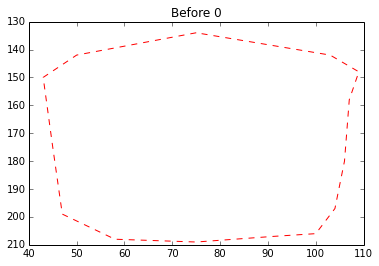

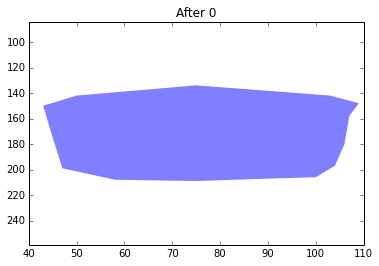

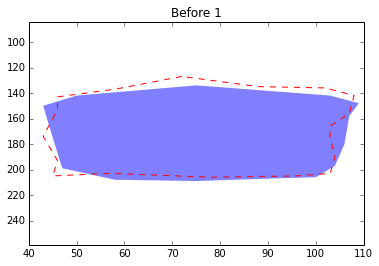

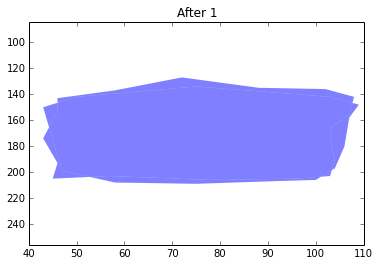

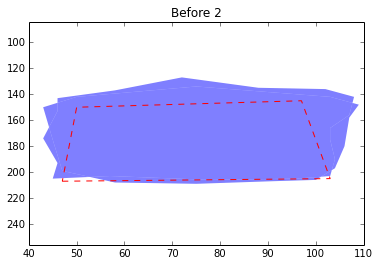

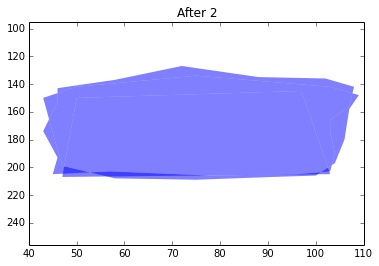

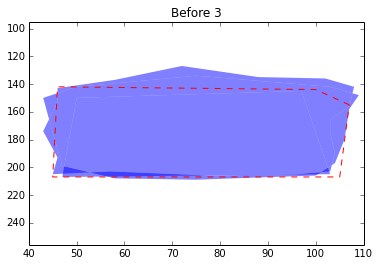

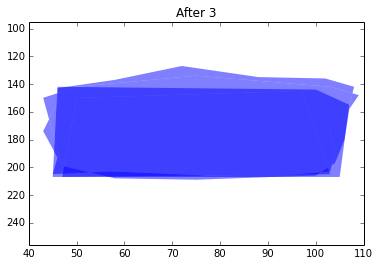

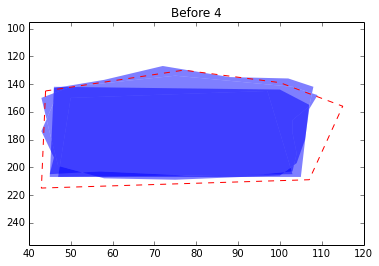

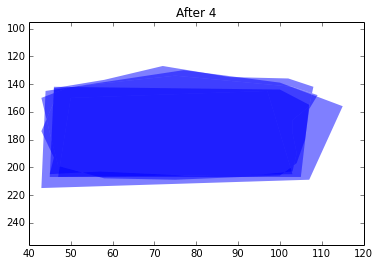

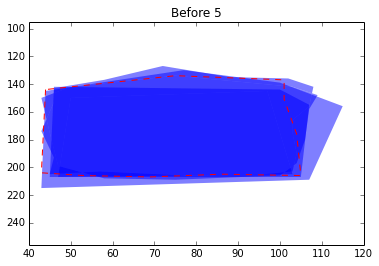

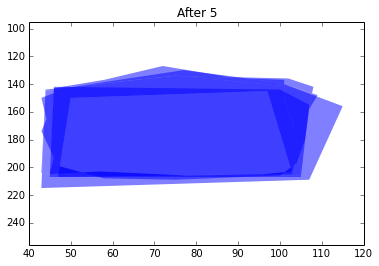

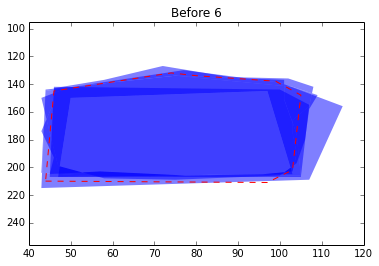

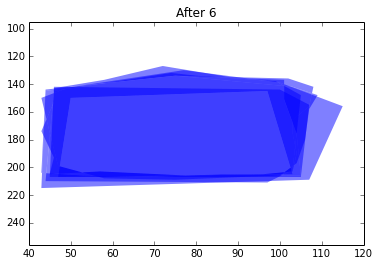

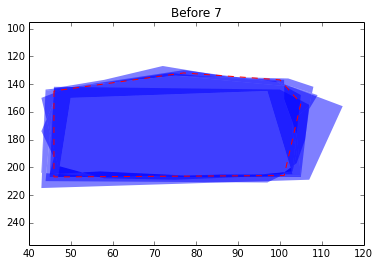

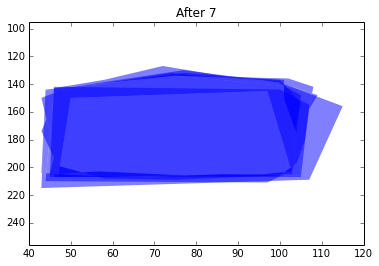

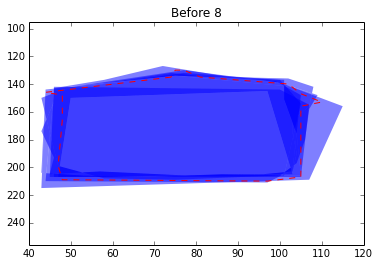

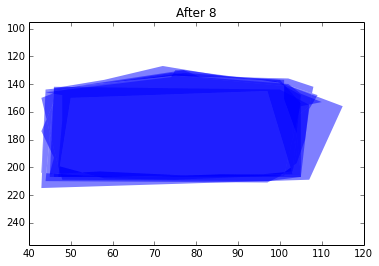

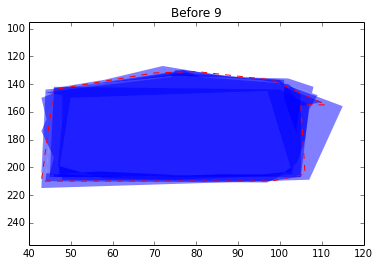

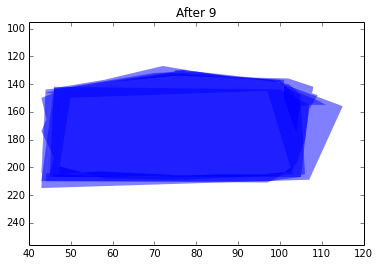

In [32]:
vtiles,BB = create_vtiles(45,10,121,PLOT=True)

start
tidx:1; vtidx0
begin geo operations
end geo operations
tidx:2; vtidx0
begin geo operations
end geo operations
tidx:2; vtidx1
begin geo operations
end geo operations
tidx:2; vtidx2
begin geo operations
end geo operations
tidx:2; vtidx3
begin geo operations
end geo operations
tidx:3; vtidx0
begin geo operations
end geo operations
tidx:3; vtidx1
begin geo operations
end geo operations
tidx:3; vtidx2
begin geo operations
end geo operations
tidx:3; vtidx3
begin geo operations
end geo operations
tidx:3; vtidx4
begin geo operations
end geo operations
tidx:3; vtidx5
begin geo operations
end geo operations
tidx:3; vtidx6
begin geo operations
end geo operations
tidx:3; vtidx7
begin geo operations
end geo operations
tidx:3; vtidx8
begin geo operations
end geo operations
tidx:3; vtidx9
begin geo operations
end geo operations
tidx:3; vtidx10
begin geo operations
end geo operations
tidx:3; vtidx11
begin geo operations
end geo operations
tidx:4; vtidx0
begin geo operations
end geo operations
ti

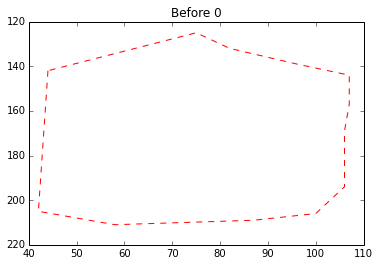

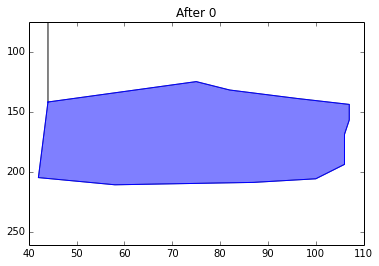

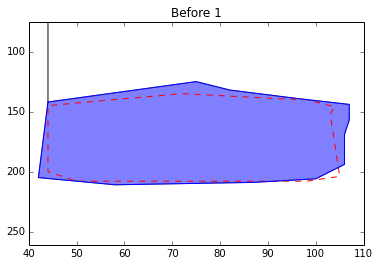

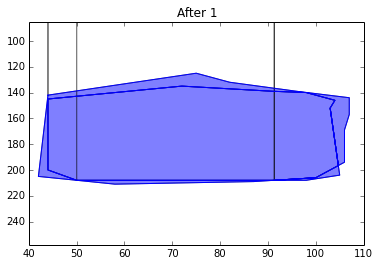

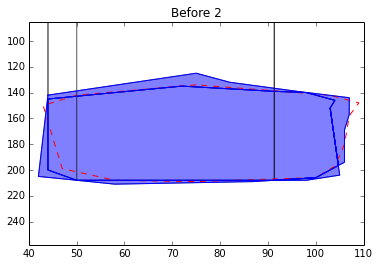

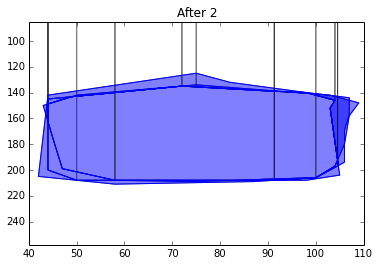

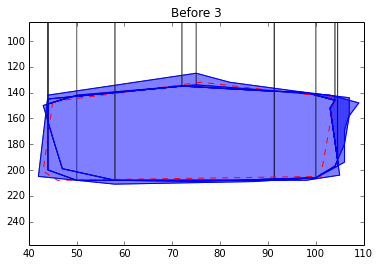

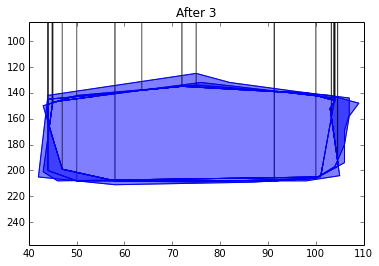

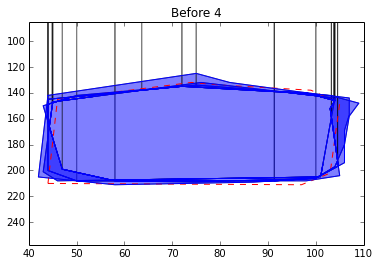

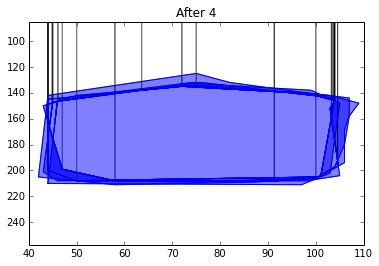

In [25]:
vtiles,BB = create_vtiles(45,5,111,PLOT=True)

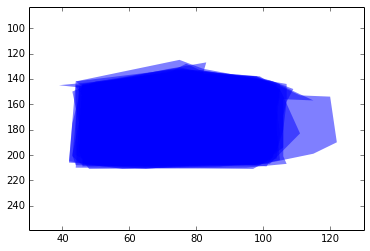

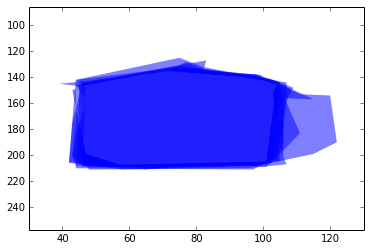

In [15]:
plt.figure()
visualizeTilesSeparate(BB,colorful=False)
plt.figure()
visualizeTilesSeparate(vtiles,colorful=False)